In [1]:
from rdkit.Chem import SDMolSupplier, Draw
from rdkit import Chem
import sys
sys.path.append("../")
from tcad.mapex.genetic import GA
from tcad.mapex.pharmacophore import PharmComplex
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol


## Loading clustered molecules

loaded 40 molecules


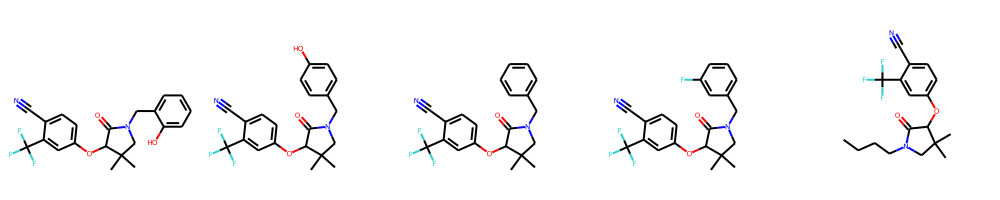

In [2]:
filepath = "../data/molecules/androgen.sdf"
molecules = []

with SDMolSupplier(filepath) as stream_in:
    
    for molecule in stream_in:
        molecules.append(molecule)

print(f"loaded {len(molecules)} molecules")
Draw.MolsToGridImage(molecules[5:10], molsPerRow=5)

## As input genetic algoritm instance takes smiles representations

In [3]:
smiles = [Chem.MolToSmiles(molecule) for molecule in molecules[:5]]

### Genetic Algorithm (GA) instance
Creates a GA instance with following params:
- Set of molecules
- Number of conformers
- Number of individs in generation
- Chance for mutation to occur
- Number of generations
- Use Crippen (False) to perform alignment
- Verbose for details

In [13]:
ga_instance = GA(smiles, 30, 10, 0.3, 50,)
ga_instance.run(logg_iter=10)

2022-01-17 15:35:22.888 | INFO     | tcad.mapex.genetic:_create_confs:44 - Generating conformations..
2022-01-17 15:35:29.121 | INFO     | tcad.mapex.genetic:_create_confs:52 - Done..
2022-01-17 15:35:30.314 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 166.41
2022-01-17 15:35:39.340 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 167.53
2022-01-17 15:35:47.966 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 167.53
2022-01-17 15:35:56.489 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 172.04
2022-01-17 15:36:06.018 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 172.04
2022-01-17 15:36:14.925 | INFO     | tcad.mapex.genetic:run:187 - Best chromosome score is: 172.04


In [16]:
# get aligned molecules amd best conformation ids
aligned_molecules = ga_instance.get_molecules()
best_chromosome = ga_instance.best_chromosome

# writing molecules to mol blocks
mol_blocks = [Chem.MolToMolBlock(mol, confId=idx) for mol, idx  in zip(aligned_molecules, best_chromosome)]

## Building a pharmacophore

In [17]:
p_complex=PharmComplex(aligned_molecules, best_chromosome)
p_complex.create()

coords = p_complex.get_coords()

## Visualize molecules and pharmacophore features

In [18]:
view = p_complex.show(mol_blocks, coords)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
view.png()